In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# This is a test file for plotting seismic data
def plot_seismic_data_2D(data):
    plt.figure(figsize=(10, 6))
    plt.imshow(data, aspect='auto', cmap='gray')
    plt.colorbar(label='Amplitude')
    plt.title('Seismic Data')
    plt.xlabel('Trace Number')
    plt.ylabel('Time Sample')
    plt.show()
    
    
def plot_seismic_data_2D_perc(data, clip_percentile=99):
    """
    Plota dados sísmicos 2D aplicando corte de percentil para eliminar outliers.
    
    Parâmetros
    ----------
    data : array_like
        Matriz 2D de amplitudes sísmicas (tempo × traços).
    clip_percentile : float, opcional
        Percentil superior para o corte. Default é 99.
        O percentil inferior será automaticamente (100 - clip_percentile).
    """
    # calcula os limites de corte
    p_low  = 100.0 - clip_percentile
    p_high = clip_percentile
    vmin = np.percentile(data, p_low)
    vmax = np.percentile(data, p_high)
    
    # aplica o corte (opcional, não altera data original)
    data_clipped = np.clip(data, vmin, vmax)
    
    # plota
    plt.figure(figsize=(10, 6))
    im = plt.imshow(data_clipped, aspect='auto', cmap='gray',
                    vmin=vmin, vmax=vmax)
    plt.colorbar(im, label='Amplitude')
    plt.title('Seismic Data (clipped at %g%%)' % clip_percentile)
    plt.xlabel('Trace Number')
    plt.ylabel('Time Sample')
    plt.show()


In [3]:
#read seismic data from a file 
train_input = np.load('/scratch/rsb/siren/siren-geo/public/dataset_warehouse/segeage/dataset/input_train_rsf4.npy')

In [4]:
train_input.shape

(839, 1, 480, 480)

Selected panel index: 528


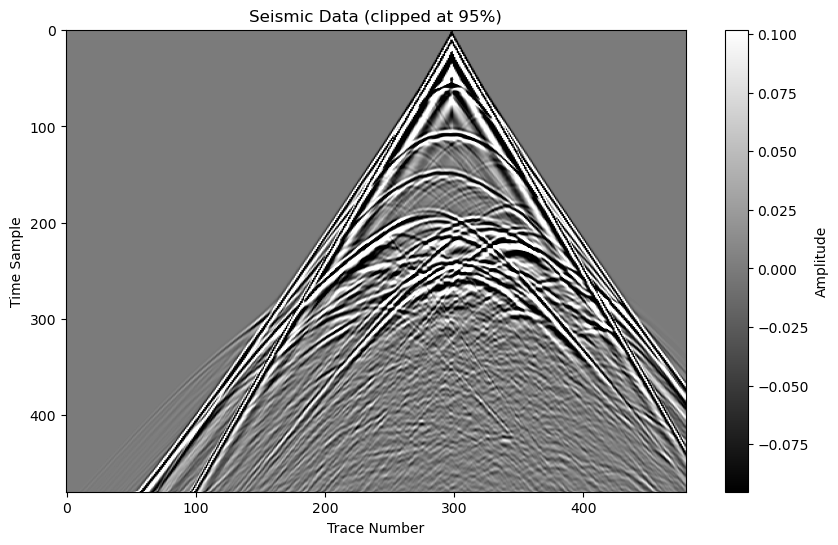

In [7]:
panel_idx = np.random.randint(0, train_input.shape[0])
print(f"Selected panel index: {panel_idx}")
panel = train_input[panel_idx, 0, ...]  # Select a single panel for plotting
plot_seismic_data_2D_perc(panel, clip_percentile=95)